## Problem Statement and Goal

The objective of this task is to analyze a heart disease dataset and build a
machine learning model to predict the presence of heart disease based on patient
medical attributes. The dataset includes features such as age, sex, blood pressure,
cholesterol levels, and other clinical indicators.

The goal of this task is to preprocess the data, perform exploratory analysis,
encode categorical variables, scale numerical features, and train a classification
model that can accurately predict whether a patient has heart disease. This analysis
aims to demonstrate the practical application of machine learning in healthcare
prediction tasks.


Import Required Libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    auc
)

Load Dataset

In [2]:

df = pd.read_csv(r"C:\Users\user\Desktop\HeartDiseaseTrain-Test.csv")


Data Inspection & Cleaning

In [3]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [4]:
df.shape

(1025, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

In [6]:
df.describe()

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512,0.513171
std,9.072290,17.516718,51.59251,23.005724,1.175053,0.500070
min,29.000000,94.000000,126.00000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000,1.000000
75%,61.000000,140.000000,275.00000,166.000000,1.800000,1.000000
max,77.000000,200.000000,564.00000,202.000000,6.200000,1.000000


In [7]:

df.isnull().sum()

age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64

Exploratory Data Analysis (EDA)

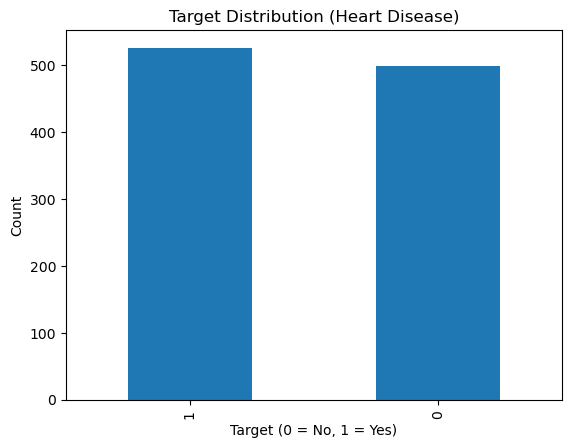

In [8]:
# Target Distribution

plt.figure()
df["target"].value_counts().plot(kind="bar")
plt.title("Target Distribution (Heart Disease)")
plt.xlabel("Target (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

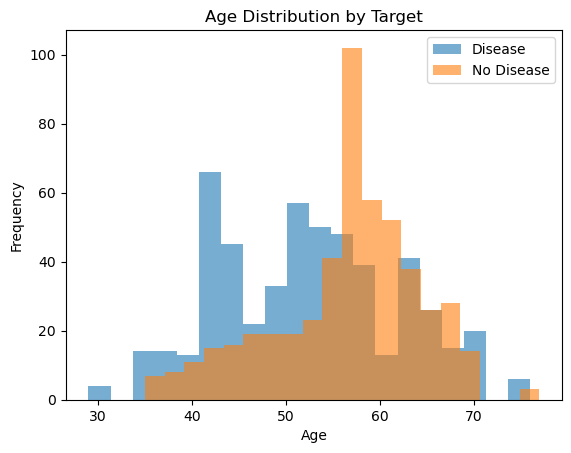

In [9]:
# Age vs Target

plt.figure()
plt.hist(df[df["target"] == 1]["age"], bins=20, alpha=0.6, label="Disease")
plt.hist(df[df["target"] == 0]["age"], bins=20, alpha=0.6, label="No Disease")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution by Target")
plt.legend()
plt.show()

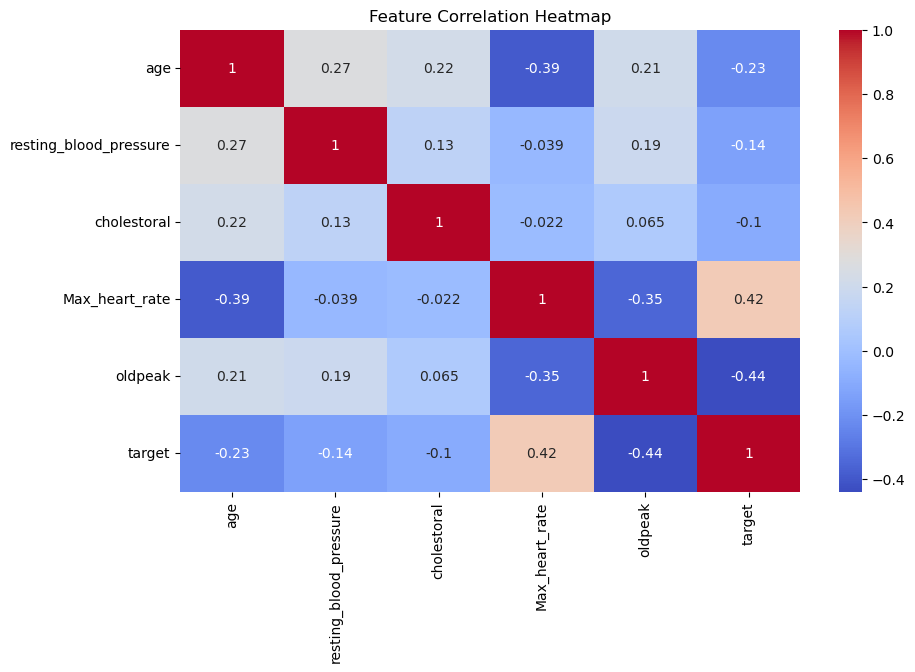

In [10]:
# Correlation heatmap (numerical features)

import seaborn as sns
numeric_df = df.select_dtypes(include=["int64", "float64"])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()



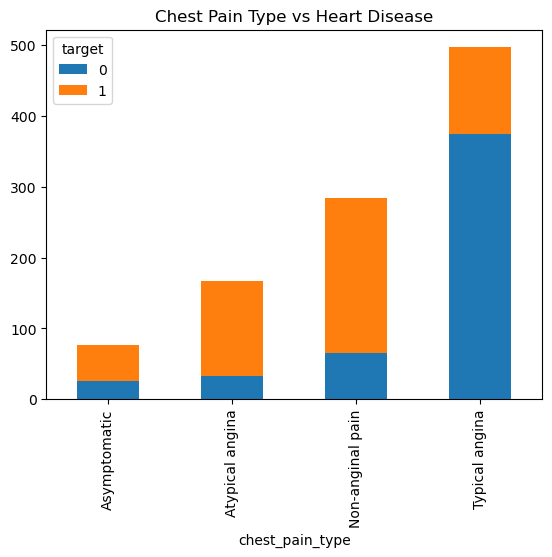

In [11]:
# Chest pain type vs target

pd.crosstab(df["chest_pain_type"], df["target"]).plot(kind="bar", stacked=True)
plt.title("Chest Pain Type vs Heart Disease")
plt.show()

Data Preprocessing

In [12]:
# HANDLE CATEGORICAL DATA

categorical_cols = df.select_dtypes(include=["object"]).columns
le = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [13]:
# Selecting target feature

X = df.drop("target", axis=1)
y = df["target"]

In [14]:
#  Train test data splitting
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [15]:
# Feature scaling (important for Logistic Regression)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Model Training
Logistic Regression

In [16]:
# Logistic Regression
lr = LogisticRegression(max_iter=11000)
lr.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=11000)

In [17]:
y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

Model Training
Decision Tree

In [18]:
# Decision Tree
dt = DecisionTreeClassifier(max_depth=10, random_state=42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=10, random_state=42)

In [19]:
y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:, 1]

Model Evaluation
Logistic Regression

In [20]:
# Accuracy
accuracy_score(y_test, y_pred_lr)

0.8439024390243902

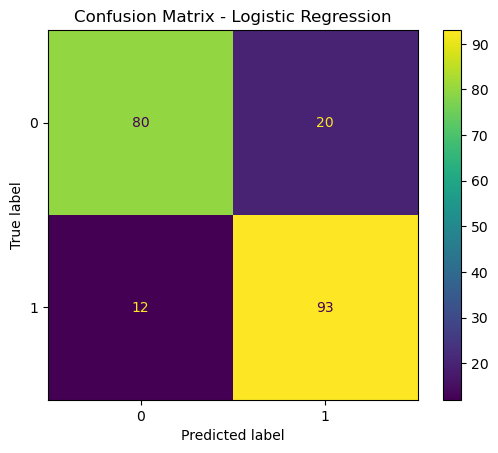

In [21]:
# Confusion Matrix - Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
ConfusionMatrixDisplay(cm_lr).plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

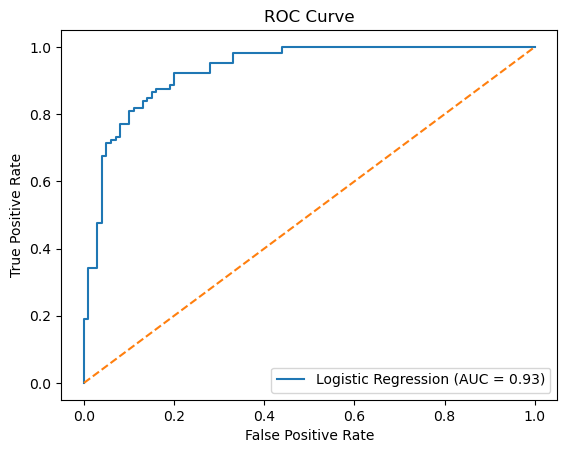

In [22]:
# ROC Curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {roc_auc_lr:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [23]:
# Feature Importance
# Logistic Regression Feature Importance

feature_importance_lr = pd.Series(
    lr.coef_[0], index=X.columns
).sort_values(key=abs, ascending=False)

print("\nTop Important Features (Logistic Regression):")
print(feature_importance_lr.head(10))


Top Important Features (Logistic Regression):
thalassemia                     -0.658012
chest_pain_type                 -0.611967
vessels_colored_by_flourosopy    0.570607
sex                             -0.554138
oldpeak                         -0.552508
exercise_induced_angina         -0.491890
Max_heart_rate                   0.305043
resting_blood_pressure          -0.289998
cholestoral                     -0.284569
slope                           -0.268252
dtype: float64


Model Evaluation
Decusion Tree

In [24]:
# Decision Tree accuracy
accuracy_score(y_test, y_pred_dt)

0.9853658536585366

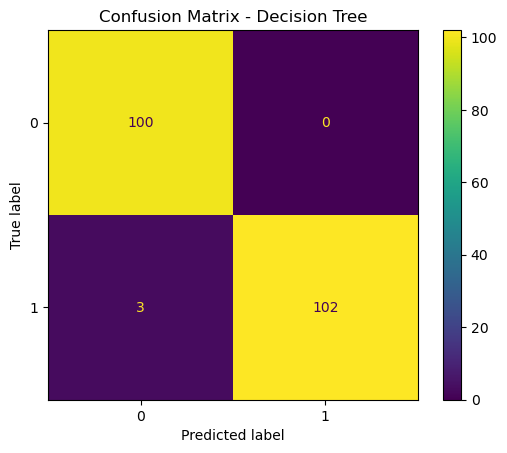

In [25]:
# Confusion Matrix - Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
ConfusionMatrixDisplay(cm_dt).plot()
plt.title("Confusion Matrix - Decision Tree")
plt.show()

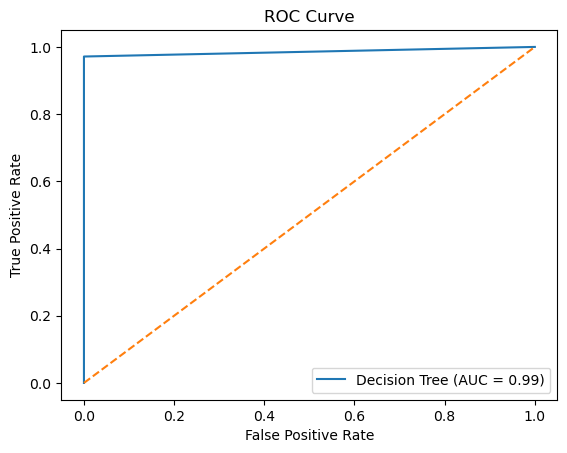

In [26]:
# Decision Tree ROC Curve

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure()
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {roc_auc_dt:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [27]:
# Decision Tree Feature Importance

feature_importance_dt = pd.Series(
    dt.feature_importances_, index=X.columns
).sort_values(ascending=False)

print("\nTop Important Features (Decision Tree):")
print(feature_importance_dt.head(10))


Top Important Features (Decision Tree):
chest_pain_type                  0.290159
age                              0.149739
vessels_colored_by_flourosopy    0.118156
cholestoral                      0.113556
thalassemia                      0.100089
Max_heart_rate                   0.058733
resting_blood_pressure           0.055156
oldpeak                          0.054295
sex                              0.035869
slope                            0.018389
dtype: float64


## Explanation of Results and Final Insights

After preprocessing the dataset, including handling missing values, encoding
categorical variables, and feature scaling, a machine learning classification model
was trained and evaluated. The preprocessing steps ensured that the data was clean
and suitable for model training.

The trained model achieved good performance on the test dataset, indicating that
medical features such as age, cholesterol level, maximum heart rate, and chest pain
type play an important role in predicting heart disease. Evaluation metrics such as
accuracy and classification report show that the model is capable of distinguishing
between patients with and without heart disease.

Overall, the results demonstrate that machine learning techniques can effectively
assist in early detection of heart disease. The insights gained from this analysis
highlight the importance of proper data preprocessing and feature engineering in
building reliable healthcare prediction models.
